In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from si_prefix import si_format
import mc_helper

/home/madvlsi/dev/git/vlsi/mp4/xschem/monte_carlo_test/mc_helper.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/vlsi/mp4/xschem/monte_carlo_test/mc_helper.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


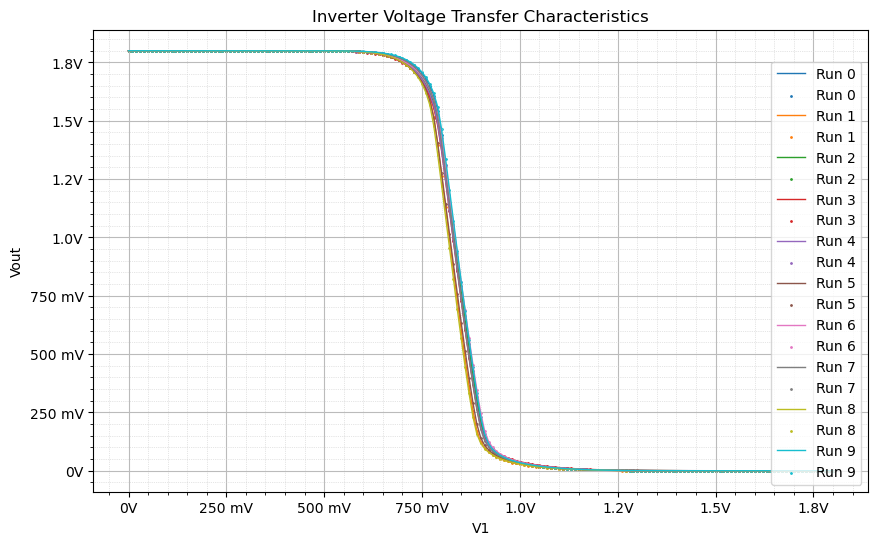

In [25]:
mc_simulations = []
for filename in os.listdir("inverter"):
    df = pd.read_csv(os.path.join("inverter", filename), delimiter = "\s+")

    def remove_wrapper(var_name):
        return var_name[2:-1]
    df.rename(remove_wrapper, axis = "columns", inplace = True)
    df.drop(remove_wrapper("v-sweep"), axis = "columns", inplace = True)
    
    mc_simulations.append(df)

plt.figure(figsize = (10, 6))
mc_helper.axes_labels("V1", "V", "Vout", "V", "Inverter Voltage Transfer Characteristics")
mc_helper.make_grids()
for i, df_simulation in enumerate(mc_simulations):
    plt.plot(np.array(df_simulation["Vin"]), np.array(df_simulation["Vout"]), linewidth = 1, label = f"Run {i}")
    plt.scatter(np.array(df_simulation["Vin"]), np.array(df_simulation["Vout"]), s = 1, label = f"Run {i}")
plt.legend(loc = "lower right")